![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Session 1 and Session 2: Assignements

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (S1 - S2)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/exercises/Session_1_2_EXERCISES.ipynb)

## Exercise 1: CSV

Analize the data of the JetBrains 2017 Python survey https://www.jetbrains.com/research/python-developers-survey-2017/

1. Download raw data from http://jb.gg/pythondevsurvey2017raw
2. Read it in pandas
3. Reproduce "What do you use Python for the most? (single answer)" chart
4. Reproduce "What do you use Python for? (multiple answers)" chart

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df_py = pd.read_csv("/content/pythondevsurvey2017_raw_data.csv")


##2. Read it in pandas


In [ ]:
df_py.head()

,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,Objective-C:What other language(s) do you use?,Go:What other language(s) do you use?,Visual Basic:What other language(s) do you use?,Scala:What other language(s) do you use?,SQL:What other language(s) do you use?,Kotlin:What other language(s) do you use?,R:What other language(s) do you use?,Swift:What other language(s) do you use?,Clojure:What other language(s) do you use?,Perl:What other language(s) do you use?,Rust:What other language(s) do you use?,Groovy:What other language(s) do you use?,TypeScript:What other language(s) do you use?,CoffeeScript:What other language(s) do you use?,HTML/CSS:What other language(s) do you use?,Other - Write In::What other language(s) do you use?,Educational purposes: What do you use Python for?,Data analysis: What do you use Python for?,DevOps / System administration / Writing automation scripts: What do you use Python for?,Software testing / Writing automated tests: What do you use Python for?,Software prototyping: What do you use Python for?,Web development: What do you use Python for?,Machine learning: What do you use Python for?,Mobile development: What do you use Python for?,Desktop development: What do you use Python for?,Computer graphics: What do you use Python for?,Network programming: What do you use Python for?,Game development: What do you use Python for?,Multimedia applications development: What do you use Python for?,Embedded development: What do you use Python for?,Programming of web parsers / scrapers / crawlers: What do you use Python for?,...,"refactor your code:When developing in Python, how often do you…?","use VCS:When developing in Python, how often do you…?","use code linting (programs that analyze code for potential errors):When developing in Python, how often do you…?","use Python virtual environments for your projects:When developing in Python, how often do you…?","use SQL databases :When developing in Python, how often do you…?","use NoSQL databases:When developing in Python, how often do you…?","run / debug or edit code on remote machines (remote hosts, VMs, etc.):When developing in Python, how often do you…?","use a Python profiler:When developing in Python, how often do you…?","write tests for your code:When developing in Python, how often do you…?","use code coverage:When developing in Python, how often do you…?","use optional type hinting:When developing in Python, how often do you…?","use Continuous Integration tools:When developing in Python, how often do you…?","use Issue Trackers:When developing in Python, how often do you…?",Do you regularly work on multiple projects at the same time?,How did you first learn about your main editor?,How often do you use your main editor?,Are you missing any features in your main editor?,How likely is it that you would recommend your main editor to a friend or colleague?,What do you think is the ratio of these two numbers?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,What do you think would be the most popular opinion?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,"Most of the time, do you...?",How many people are in your project team?,What is your employment status?,Choose one from the list::Which of the following industries best describes your company's business?,Choose one from the list::Which of the following industries do you develop for?,How long have you been working in the IT industry?,DBA:Which of the following best describes your job role(s)?,Architect:Which of the

In [ ]:
list_columns=df_py.columns

In [ ]:
#Number of columns
len(list_columns)

162

In [ ]:
#Rows with only people that use python
only_python=df_py[df_py['Is Python the main language you use for your current projects?']!='No, I don’t use Python for my current projects']

In [ ]:
#How many are there? This will be use after
total=len(only_python)
total

8112

In [ ]:
#Only obtaining necessary columns 
df_lang=df_py[df_py.columns[25:41]]

In [ ]:
#Renaming columns
df_lang.columns=['Educational purposes','Data analysis','DevOps / System administration / Writing automation scripts','Software testing / Writing automated tests','Software prototyping','Web development','Machine learning','Mobile development','Desktop development','Computer graphics','Network programming','Game development','Multimedia applications development','Embedded development','Programming of web parsers / scrapers / crawlers','Other - Write In']

In [ ]:
#What data does it have
for (columnName, columnData) in df_lang.iteritems():
   print('Colunm Name : ', columnName)
   print('Column Contents : ', columnData.unique())

Colunm Name :  Educational purposes
Column Contents :  ['Educational purposes' nan]
Colunm Name :  Data analysis
Column Contents :  ['Data analysis' nan]
Colunm Name :  DevOps / System administration / Writing automation scripts
Column Contents :  ['DevOps / System administration / Writing automation scripts' nan]
Colunm Name :  Software testing / Writing automated tests
Column Contents :  [nan 'Software testing / Writing automated tests']
Colunm Name :  Software prototyping
Column Contents :  [nan 'Software prototyping']
Colunm Name :  Web development
Column Contents :  [nan 'Web development']
Colunm Name :  Machine learning
Column Contents :  [nan 'Machine learning']
Colunm Name :  Mobile development
Column Contents :  [nan 'Mobile development']
Colunm Name :  Desktop development
Column Contents :  [nan 'Desktop development']
Colunm Name :  Computer graphics
Column Contents :  [nan 'Computer graphics']
Colunm Name :  Network programming
Column Contents :  [nan 'Network programming']


##3. Reproduce "What do you use Python for the most? (single answer)" chart

In [ ]:
#We need the count of people who choose the purpose of python
df_val_count=[[]]
for (columnName, columnData) in df_lang.iteritems():
  df_val_count.append([columnName,columnData.count()])

df_val_count=pd.DataFrame(df_val_count)
print( df_val_count)

                                                    0       1
0                                                None     NaN
1                                Educational purposes  2279.0
2                                       Data analysis  4057.0
3   DevOps / System administration / Writing autom...  2827.0
4          Software testing / Writing automated tests  2141.0
5                                Software prototyping  1779.0
6                                     Web development  3991.0
7                                    Machine learning  2542.0
8                                  Mobile development   454.0
9                                 Desktop development  1599.0
10                                  Computer graphics   838.0
11                                Network programming  1692.0
12                                   Game development   697.0
13                Multimedia applications development   265.0
14                               Embedded development   576.0
15   Pro

In [ ]:
#Renaming columns again
df_val_count.columns=['What do you use Python for?','Count_']
df_val_count.dropna(inplace=True)
df_val_count.set_index('What do you use Python for?')

,Count_
What do you use Python for?,
Educational purposes,2279.0
Data analysis,4057.0
DevOps / System administration / Writing automation scripts,2827.0
Software testing / Writing automated tests,2141.0
Software prototyping,1779.0
Web development,3991.0
Machine learning,2542.0
Mobile development,454.0
Desktop development,1599.0


In [ ]:
#Getting percentage (We calculated the Total previosly )
df_val_count['Percentage_']=(df_val_count['Count_']*100)/total

In [ ]:
df_val_count

,What do you use Python for?,Count_,Percentage_
1,Educational purposes,2279.0,28.094181
2,Data analysis,4057.0,50.012327
3,DevOps / System administration / Writing autom...,2827.0,34.849606
4,Software testing / Writing automated tests,2141.0,26.392998
5,Software prototyping,1779.0,21.930473
6,Web development,3991.0,49.198718
7,Machine learning,2542.0,31.336292
8,Mobile development,454.0,5.596647
9,Desktop development,1599.0,19.711538
10,Computer graphics,838.0,10.330375


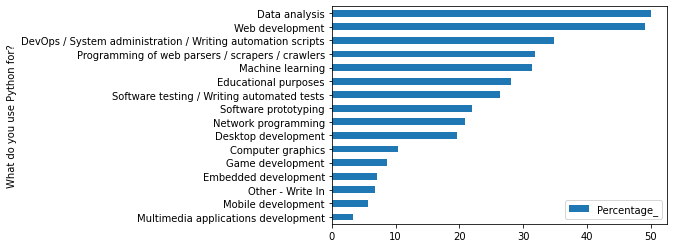

In [ ]:
#Bar chart
df_val_count = df_val_count.sort_values(by=['Percentage_'], ascending=True)
df_val_count.plot.barh(x='What do you use Python for?', y='Percentage_', rot=0)

**According to the website, we have the same values **
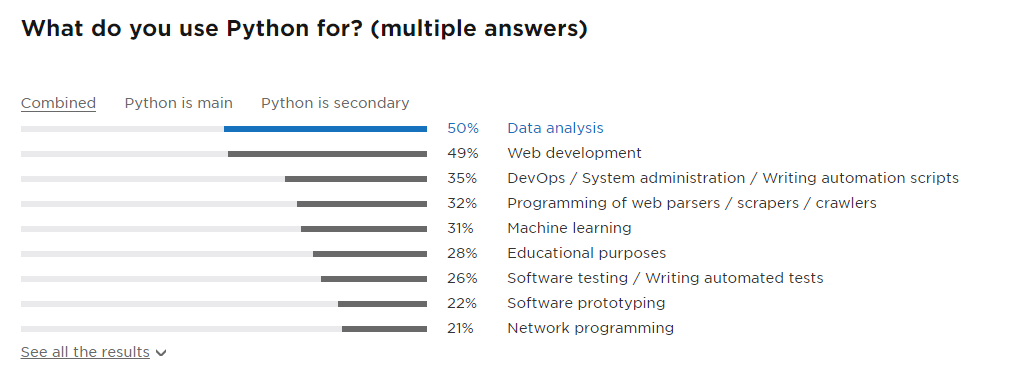

##4. Reproduce "What do you use Python for? (multiple answers)" chart

In [ ]:
#Only obtaining necessary columns 
df_py_m=df_py[df_py.columns[41]]
# What do you use Python for the most?

In [ ]:
df_py_mult=df_py_m.value_counts()
df_py_mult=pd.DataFrame(df_py_mult)
df_py_mult.reset_index(inplace=True)


In [ ]:
df_py_mult.dropna(inplace=True)
df_py_mult

,index,What do you use Python for the most?
0,Web development,2112
1,Data analysis,1430
2,Educational purposes,763
3,DevOps / System administration / Writing autom...,754
4,Machine learning,696
5,Desktop development,458
6,Programming of web parsers / scrapers / crawlers,300
7,Other - Write In:,284
8,Software testing / Writing automated tests,275
9,Network programming,268


In [ ]:
#Renaming columns

df_py_mult.columns=('Python for','Count_')
df_py_mult

,Python for,Count_
0,Web development,2112
1,Data analysis,1430
2,Educational purposes,763
3,DevOps / System administration / Writing autom...,754
4,Machine learning,696
5,Desktop development,458
6,Programming of web parsers / scrapers / crawlers,300
7,Other - Write In:,284
8,Software testing / Writing automated tests,275
9,Network programming,268


In [ ]:
#Getting percentage (We calculated the total previously)
df_py_mult['Percentage_']=(df_py_mult['Count_']*100)/total
df_py_mult

,Python for,Count_,Percentage_
0,Web development,2112,26.035503
1,Data analysis,1430,17.628205
2,Educational purposes,763,9.405819
3,DevOps / System administration / Writing autom...,754,9.294872
4,Machine learning,696,8.579882
5,Desktop development,458,5.645957
6,Programming of web parsers / scrapers / crawlers,300,3.698225
7,Other - Write In:,284,3.500986
8,Software testing / Writing automated tests,275,3.390039
9,Network programming,268,3.303748


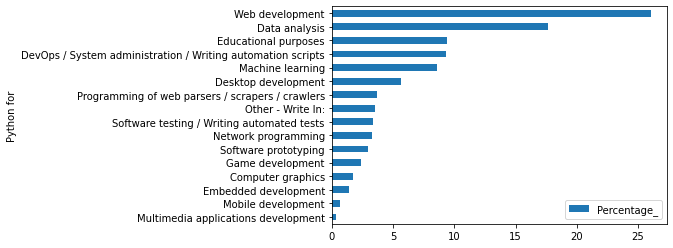

In [ ]:
#Bar chart
df_py_mult = df_py_mult.sort_values(by=['Percentage_'], ascending=True)
df_py_mult.plot.barh(x='Python for', y='Percentage_',rot=0)

**According to the website, we have the same values**
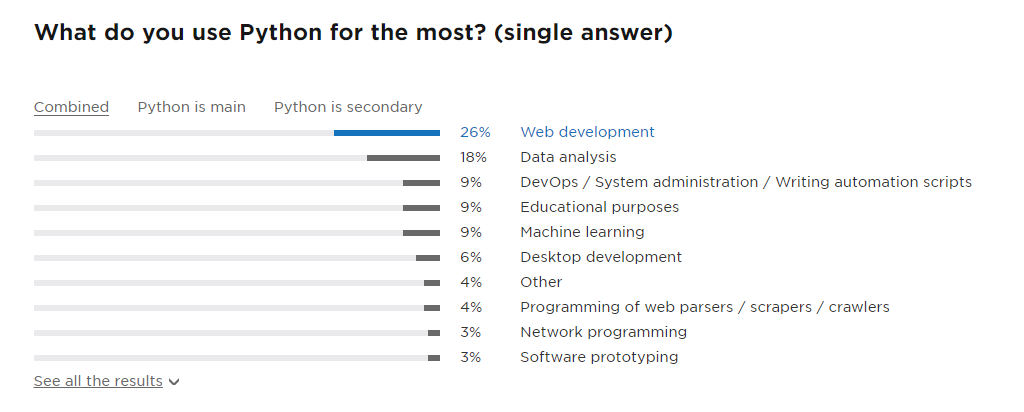

# Exercise 2: slicing arrays

Given the array provided in the next cell. Do the following with slicing (check the other notebooks for examples)



*   Print the whole array using slice
*   Print number 12
*   Reverse the array
*   Reverse only one row in the array
*   Slice the first three columns in the array
*   Slice the last three columns and reverse them
*   Slice the last two rows and print them
*   Slice the last integers in a row
*   Slice rows and columns


[Here](https://machinelearningmastery.com/index-slice-reshape-numpy-arrays-machine-learning-python/) some good examples ;-)





In [ ]:
import numpy as np

a = [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15], [16, 17, 18, 19, 20]]
nd_a = np.array(a)
nd_a

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

*   **Print the whole array using slice**

In [ ]:
nd_a[:]

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])



*   **Print number 12**



In [ ]:
nd_a[2,1:2]

array([12])



*   **Reverse the array**



In [ ]:
np.flip(nd_a)  
##nd_a[::-1]

array([[20, 19, 18, 17, 16],
       [15, 14, 13, 12, 11],
       [10,  9,  8,  7,  6],
       [ 5,  4,  3,  2,  1]])

**Reverse only one row in the array**

In [ ]:
##nd_a[1::-1]
nd_b =nd_a
nd_b[0] = np.flip(nd_b[0])
nd_b


array([[ 5,  4,  3,  2,  1],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

**Slice the first three columns in the array**

In [ ]:
nd_a[:,[0,1,2]]

array([[ 1,  2,  3],
       [ 6,  7,  8],
       [11, 12, 13],
       [16, 17, 18]])

**Slice the last three columns and reverse them**

In [ ]:
np.flip(nd_a[:,[2,3,4]])

array([[20, 19, 18],
       [15, 14, 13],
       [10,  9,  8],
       [ 5,  4,  3]])

**Slice the last two rows and print them**

In [ ]:
nd_a[-2:]

array([[11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

**Slice the last integers in a row**

In [ ]:
nd_a[:,[4]]

array([[ 5],
       [10],
       [15],
       [20]])

**Slice rows and columns**

In [ ]:
nd_a[:]

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

# Exercise 3: when is best to bike alone?

Given the bike dataset:

* Download the Dataset using curl
* Open the dataset using Pandas
* Display the DataFrame
* Reply to the following questions (either by plotting the graph and summarizing the values):

    * When are the busiest hours per week in Total?
    * Where will you be more comfortable (alone) riding during the week in West or East?
    * What about riding during the business days? When and where are the best hours to ride alone between 06:00 and 10:00? And between 15:00 and 20:00?
    * What happened during the coronavirus pandemic? Did the daily riding hours change? How many riders are passing through the bridge comparing 2018 and 2020?

**Download the Dataset using curl**

In [3]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4248k    0 4248k    0     0  1477k      0 --:--:--  0:00:02 --:--:-- 1477k


**Open the dataset using Pandas**

In [4]:
import pandas as pd

data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.columns = ['Total', 'East', 'West']
data['Total'] = data.eval('East + West')

**Display the DataFrame**

In [5]:
data.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [ ]:
%matplotlib inline
import seaborn; seaborn.set()
import matplotlib.pyplot as plt

## **When are the busiest hours per week in Total?**

**Looking the information during the week**

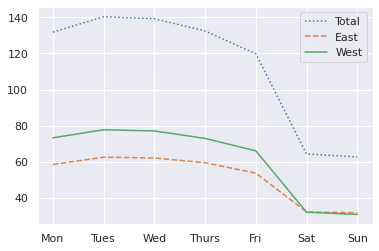

In [ ]:
import numpy as np
by_weekday = data.groupby(data.index.weekday).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

In [ ]:
by_time = data.groupby([data.index.weekday, data.index.time]).mean()
by_time.head()

Total      East      West
Date                                       
0    00:00:00  7.054254  2.985203  4.069051
     01:00:00  3.350185  1.471023  1.879162
     02:00:00  2.367448  1.193588  1.173859
     03:00:00  2.278668  1.213317  1.065351
     04:00:00  7.257707  3.891492  3.366215

In [ ]:
by_time.drop('East', axis=1, inplace=True)
by_time.drop('West', axis=1, inplace=True)
by_time.head()

Total
Date                   
0    00:00:00  7.054254
     01:00:00  3.350185
     02:00:00  2.367448
     03:00:00  2.278668
     04:00:00  7.257707

**We group the information to identify the busiest day, now we need the hour!**

In [ ]:
by_time.groupby('Date').max('Total')

,Total
Date,
0,512.352651
1,541.890259
2,530.200492
3,492.161330
4,420.223181
5,140.670777
6,153.048089


**We will rank per day and hour**

In [ ]:
by_time['rank_hour_week'] = by_time.groupby('Date').rank(ascending=False)
by_time.head(20)

Total  rank_hour_week
Date                                     
0    00:00:00    7.054254            21.0
     01:00:00    3.350185            22.0
     02:00:00    2.367448            23.0
     03:00:00    2.278668            24.0
     04:00:00    7.257707            20.0
     05:00:00   32.699137            17.0
     06:00:00  115.215783             9.0
     07:00:00  298.378545             4.0
     08:00:00  427.448829             2.0
     09:00:00  230.501850             6.0
     10:00:00   97.339088            11.0
     11:00:00   75.863132            15.0
     12:00:00   78.618989            14.0
     13:00:00   85.971640            12.0
     14:00:00   97.749692            10.0
     15:00:00  136.676942             8.0
     16:00:00  265.505549             5.0
     17:00:00  512.352651             1.0
     18:00:00  347.676942             3.0
     19:00:00  158.903822             7.0

**We have the ranking per day and hour , the busiest hour during the week**

In [ ]:
Bike_busiest_hour_week = by_time[by_time.rank_hour_week == 1]
Bike_busiest_hour_week.drop('rank_hour_week', axis=1, inplace=True)
Bike_busiest_hour_week.rename_axis(['Dia', 'Hora'], inplace=True)
Bike_busiest_hour_week.rename(index={0: 'Mon',1:'Tue',2:'Wed',3:'Thu',4:'fri',5:'Sat',6:'Sun'}, inplace=True)
Bike_busiest_hour_week.head(10)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4304: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,,Total
Dia,Hora,
Mon,17:00:00,512.352651
Tue,17:00:00,541.890259
Wed,17:00:00,530.200492
Thu,17:00:00,492.161330
fri,17:00:00,420.223181
Sat,15:00:00,140.670777
Sun,14:00:00,153.048089


**During the weekday, the busiest hour is 17:00. Only on the weekend's change between 15:00 and 14:00, it's very similar with weekdays.**

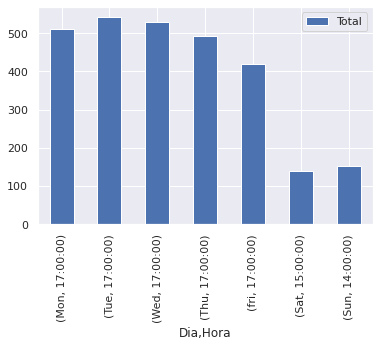

In [ ]:
Bike_busiest_hour_week.plot(kind='bar')

##**Where will you be more comfortable (alone) riding during the week in West or East?**

In [ ]:
by_day = data.groupby([data.index.weekday]).mean()
by_day.rename_axis(['Dia'], inplace=True)
by_day.drop('Total', axis=1, inplace=True)
by_day.rename(index={0: 'Mon',1:'Tue',2:'Wed',3:'Thu',4:'fri',5:'Sat',6:'Sun'}, inplace=True)
by_day.head(10)

,East,West
Dia,,
Mon,58.526819,73.285193
Tue,62.576721,77.754111
Wed,62.118816,77.098945
Thu,59.495177,72.966954
fri,53.746660,66.076053
Sat,32.259659,32.089139
Sun,31.820523,30.876510


**You will be more comfortable riding alone on Sundays (West). 
If you don't have time on weekends, You should ride on weekdays heading east.**

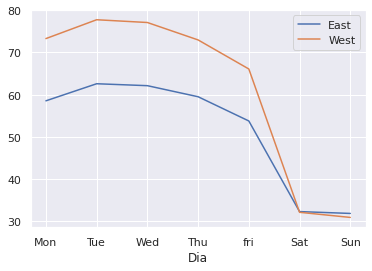

In [ ]:
by_day.plot()

##**What about riding during the business days? When and where are the best hours to ride alone between 06:00 and 10:00? And between 15:00 and 20:00?**

In [ ]:
by_bus_day = data.copy()
by_bus_day.drop('Total', axis=1, inplace=True)


**I am filtering business days and hours (06:00 to 10:00)**

In [ ]:
by_bus_day_06_10 = by_bus_day[(by_bus_day.index.hour > 5 ) & (by_bus_day.index.hour < 11) & (by_bus_day.index.weekday < 5 )]
by_bus_day_06_10.head()

,East,West
Date,,
2012-10-03 06:00:00,105.0,50.0
2012-10-03 07:00:00,257.0,95.0
2012-10-03 08:00:00,291.0,146.0
2012-10-03 09:00:00,172.0,104.0
2012-10-03 10:00:00,72.0,46.0


**We identify that the best hour to ride alone is 06:00 heading west**

In [ ]:
by_bus_day_06_10 = by_bus_day_06_10.groupby([ by_bus_day_06_10.index.time]).mean()
by_bus_day_06_10.head(20)

,East,West
06:00:00,72.202020,46.564178
07:00:00,189.646957,114.093865
08:00:00,251.848731,173.441981
09:00:00,125.491250,104.931969
10:00:00,51.877742,48.246241


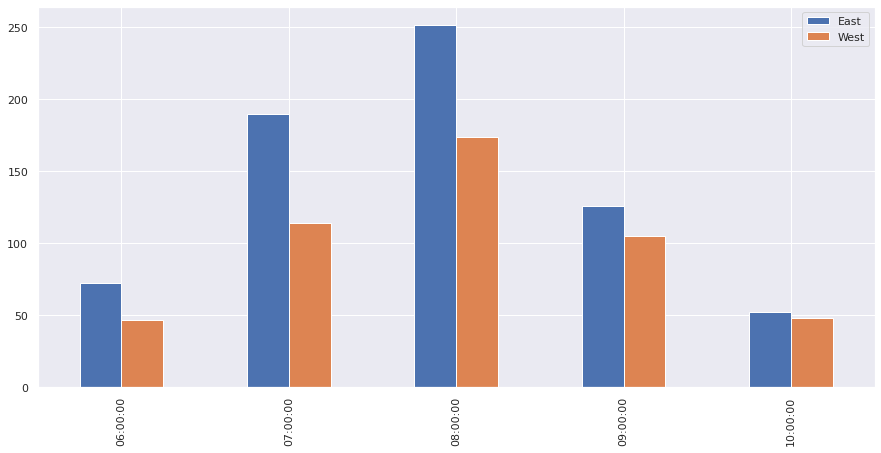

In [ ]:
by_bus_day_06_10.plot(kind='bar',figsize=(15, 7))

**I am filtering business days and hours (15:00 to 20:00)**

In [ ]:
by_bus_day_15_20 = by_bus_day[(by_bus_day.index.hour > 14 ) & (by_bus_day.index.hour < 21) & (by_bus_day.index.weekday < 5 )]
by_bus_day_15_20.head()

,East,West
Date,,
2012-10-03 15:00:00,72.0,92.0
2012-10-03 16:00:00,133.0,182.0
2012-10-03 17:00:00,192.0,391.0
2012-10-03 18:00:00,122.0,258.0
2012-10-03 19:00:00,59.0,69.0


**We identify that the best hour to ride alone is 20:00 heading east**

In [ ]:
##by_bus_day_15_20.plot(by_bus_day_15_20.groupby([ by_bus_day_15_20.index.time]).mean())
by_bus_day_15_20_1 = by_bus_day_15_20.groupby([ by_bus_day_15_20.index.time]).mean()
by_bus_day_15_20_1.head(20)

,East,West
15:00:00,58.355101,81.895022
16:00:00,89.993593,182.719813
17:00:00,135.690734,363.688270
18:00:00,108.350665,227.725973
19:00:00,58.151306,101.564317
20:00:00,34.779694,53.459586


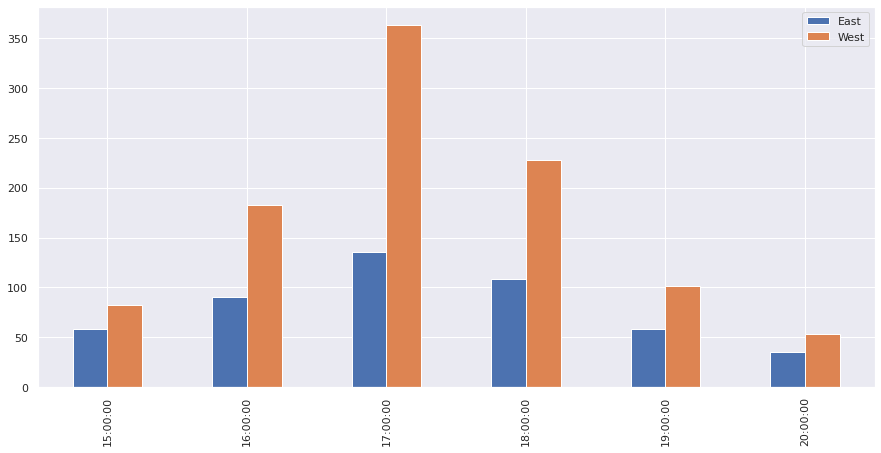

In [ ]:
by_bus_day_15_20_1.plot(kind='bar',figsize=(15, 7))

##**What happened during the coronavirus pandemic? Did the daily riding hours change? How many riders are passing through the bridge comparing 2018 and 2020?**

In [6]:
by_covid_trend = data.copy()
#by_covid_trend.drop('East', axis=1, inplace=True)
#by_covid_trend.drop('West', axis=1, inplace=True)
by_covid_trend.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


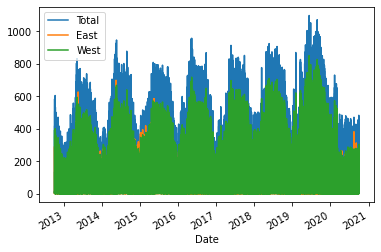

In [7]:
by_covid_trend.plot()

In [8]:
by_covid_trend_2020 = by_covid_trend[ by_covid_trend.index.year == 2020]
by_covid_trend_2020 = by_covid_trend_2020.groupby( by_covid_trend_2020.index.hour).mean()
#by_covid_trend_2018_2020.rename_axis(['Anio', 'Hora'], inplace=True)
by_covid_trend_2020

,Total,East,West
Date,,,
0,4.938303,1.917738,3.020566
1,2.570694,1.051414,1.519280
2,1.971649,0.796392,1.175258
3,1.352185,0.578406,0.773779
4,4.187661,2.300771,1.886889
5,16.437018,7.812339,8.624679
6,56.647815,26.508997,30.138817
7,131.262211,60.984576,70.277635
8,182.578406,75.850900,106.727506


In [9]:
by_covid_trend_2018 = by_covid_trend[ by_covid_trend.index.year == 2018]
by_covid_trend_2018 = by_covid_trend_2018.groupby( by_covid_trend_2018.index.hour).mean()
#by_covid_trend_2018_2020.rename_axis(['Anio', 'Hora'], inplace=True)
by_covid_trend_2018

,Total,East,West
Date,,,
0,9.945205,3.884932,6.060274
1,5.136986,2.230137,2.906849
2,3.239011,1.370879,1.868132
3,3.304110,1.613699,1.690411
4,8.726027,3.961644,4.764384
5,29.041096,15.915068,13.126027
6,97.989041,50.843836,47.145205
7,250.315068,128.224658,122.090411
8,361.849315,181.200000,180.649315


**We show that the trend decreased in the number of riders**

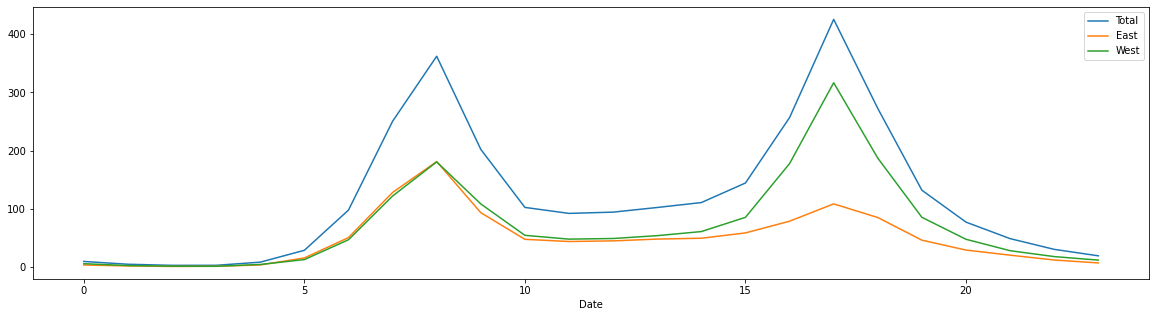

In [10]:
by_covid_trend_2018.plot(figsize=(20, 5))

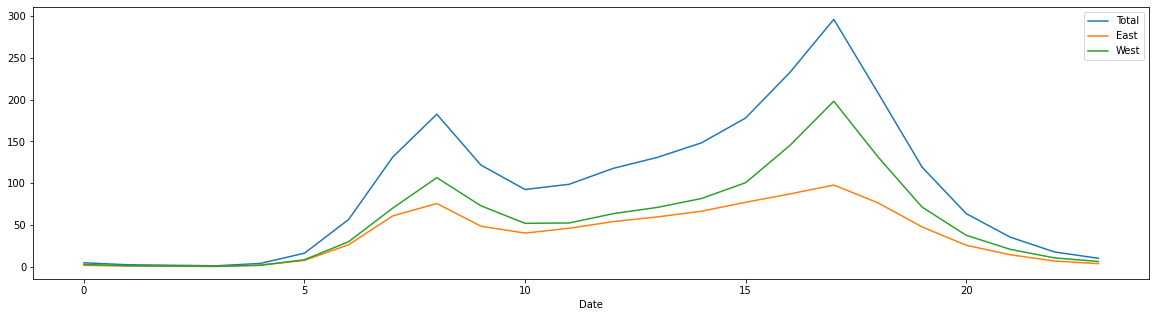

In [11]:
by_covid_trend_2020.plot(figsize=(20, 5))

In [17]:
by_covid_trend_2 = by_covid_trend_2018.join(by_covid_trend_2020, lsuffix='_2018', rsuffix='_2020')  


,Total_2018,East_2018,West_2018,Total_2020,East_2020,West_2020
Date,,,,,,
0,9.945205,3.884932,6.060274,4.938303,1.917738,3.020566
1,5.136986,2.230137,2.906849,2.570694,1.051414,1.519280
2,3.239011,1.370879,1.868132,1.971649,0.796392,1.175258
3,3.304110,1.613699,1.690411,1.352185,0.578406,0.773779
4,8.726027,3.961644,4.764384,4.187661,2.300771,1.886889
5,29.041096,15.915068,13.126027,16.437018,7.812339,8.624679
6,97.989041,50.843836,47.145205,56.647815,26.508997,30.138817
7,250.315068,128.224658,122.090411,131.262211,60.984576,70.277635
8,361.849315,181.200000,180.649315,182.578406,75.850900,106.727506


# Exercise 4: let's get rich!

Given this apple stock history [this dataset](https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/appl_1980_2014.csv)

* Open the dataset using Pandas
* Display the DataFrame
* Reply to the following questions (either by plotting the graph and summarizing the values):

    * How much money will you have now if you bought 10 stocks for Apple at the end of January 2000 and you sold it at the end of 2013
    * When was the peak maximum of volume of trades done?
    * When was the month with the lowest close?
    * And the lowest close of the day in the whole dataset?

In [151]:
data = pd.read_csv('https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/appl_1980_2014.csv')

In [152]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [154]:
#Checking my data for year 2000
data[data.Date.eq('2000-01-31')]

,Date,Open,High,Low,Close,Volume,Adj Close
3630,2000-01-31,101.0,103.87,94.5,103.75,175420000,3.54


In [155]:
#Checking my data for year 2013
data[data.Date.eq('2013-12-31')]

,Date,Open,High,Low,Close,Volume,Adj Close
129,2013-12-31,554.17,561.28,554.0,561.02,55771100,79.23


##How much money will you have now if you bought 10 stocks for Apple at the end of January 2000 and you sold it at the end of 2013

In [157]:
data2 = data.copy()

In [158]:
##adj_close_2013 = (data[data.Date.eq('2013-12-31')]['Adj Close']) 
adj_close_2013 = data2[data2['Date'] == '2013-12-31']['Adj Close']
adj_close_2013 = pd.DataFrame(adj_close_2013)
adj_close_2013.reset_index(inplace=True)
adj_close_2013.head()

,index,Adj Close
0,129,79.23


In [159]:
adj_close_2000 = (data2[data2.Date.eq('2000-01-31')]['Adj Close'])
adj_close_2000 = pd.DataFrame(adj_close_2000)
adj_close_2000.reset_index(inplace=True)
adj_close_2000.head()

,index,Adj Close
0,3630,3.54


**We would have won 756.9 if we had bought 10 stock for apple.**

In [160]:
Tot_benefit = adj_close_2013.subtract(adj_close_2000) 
Tot_benefit.drop('index', axis=1, inplace=True)
Tot_benefit*10

,Adj Close
0,756.9


##When was the peak maximum of volume of trades done?

In [161]:
max_Volume=data.Volume.max()
max_Volume

1855410200

In [164]:
data[data.Volume.eq(max_Volume)]

,Date,Open,High,Low,Close,Volume,Adj Close
3461,2000-09-29,28.19,29.0,25.38,25.75,1855410200,1.76


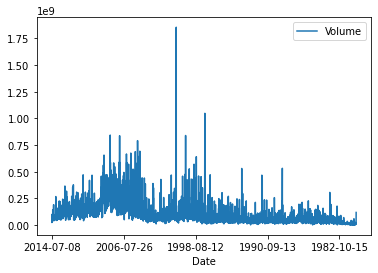

In [168]:
data.plot(x='Date',y='Volume')

##When was the month with the lowest close?

In [176]:
data3 = data.copy()

In [177]:
data3['Date'] = data3['Date'].astype('datetime64[ns]')
data3 = data3.set_index('Date')
data3.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


**July had the lowest close**

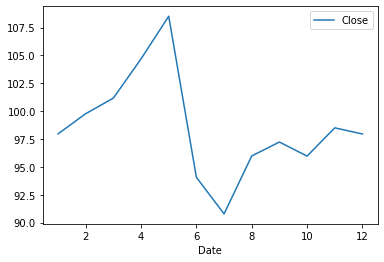

In [185]:
Lowest_close_month = data3.groupby( data3.index.month).mean()
Lowest_close_month.plot(y='Close')

##And the lowest close of the day in the whole dataset?

In [166]:
min_Close=data.Close.min()
min_Close

11.0

In [167]:
data[data.Close.eq(min_Close)]

,Date,Open,High,Low,Close,Volume,Adj Close
8070,1982-07-08,11.12,11.12,11.0,11.0,41081600,0.17


**The day 7 we had the lowest close**

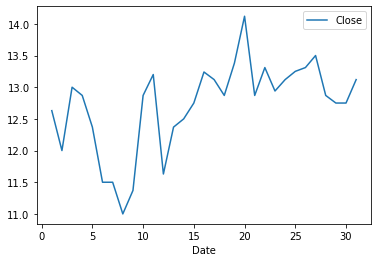

In [191]:
Lowest_close_day = data3.groupby( data3.index.day).min()
Lowest_close_day.plot(y='Close')